In [2]:
import pandas as pd
import numpy as np
import math 
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter


In [3]:
df=pd.read_csv("visitor_data.csv")
df

ParserError: Error tokenizing data. C error: Expected 3 fields in line 3, saw 6


In [ ]:
purchase=df.loc[ (df['step_3']== "purchese_success")
                     |(df['step_4']== "purchese_success")|(df['step_5']== "purchese_success")|(df['step_6']== "purchese_success")
                     |(df['step_7']== "purchese_success")|(df['step_8']== "purchese_success")|(df['step_9']== "purchese_success")
                     |(df['step_10']== "purchese_success")|(df['step_11']== "purchese_success")|(df['step_12']== "purchese_success")
                     |(df['step_13']== "purchese_success")|(df['step_14']== "purchese_success")|(df['step_15']== "purchese_success")]

# Bounce Rate for phones

In [ ]:
df_phones=df.loc[(df['source']== 'ios')|(df['source']== 'android')]

In [17]:
#bounce_rate for phones
bounce_phones=[]
for index,row in df_phones.iterrows():
         if pd.isnull(row[3])==True:                  
            bounce_phones.append(row[0])
        
Counter(bounce_phones)        

Counter({'twitter_share': 1702,
         'google': 2112,
         'facebook_share': 3176,
         'direct': 466,
         'unknown': 356,
         'facebook_advert': 1434})

In [14]:
df_phones["platform"].value_counts()

google             28400
facebook_share     25200
twitter_share      10000
direct              8600
facebook_advert     4000
advert_linkedin     4000
unknown             1600
Name: platform, dtype: int64

facebook_advert=1434/4000
print(facebook_advert)
advert_linkedin=0
print(advert_linkedin)

# Bounce rate for PCs

In [116]:
df_pcs=df.loc[(df['source']== 'mac')|(df['source']== 'windows')]

In [117]:
bounce_pc=[]
for index,row in df_pcs.iterrows():
         if pd.isnull(row[3])==True:                  
            bounce_pc.append(row[0])
        
Counter(bounce_pc)        

Counter({'facebook_advert': 1682,
         'facebook_share': 1085,
         'google': 1636,
         'twitter_share': 804,
         'direct': 258,
         'unknown': 123})

# Bounce Rate

In [4]:
bounce=[]
for index,row in df.iterrows():
         if pd.isnull(row[3])==True:                  
            bounce.append(row[0])
        
Counter(bounce)        

Counter({'facebook_advert': 3965,
         'facebook_share': 4261,
         'twitter_share': 2506,
         'google': 3748,
         'direct': 724,
         'unknown': 479})

In [5]:
df["platform"].value_counts()

google             49200
facebook_share     39600
twitter_share      15600
direct             14600
facebook_advert    10000
advert_linkedin    10000
unknown             2600
Name: platform, dtype: int64

In [8]:
facebook_advert= 3965/10000
print("facebook_advert",facebook_advert)
advert_linkedin=0 
print("advert_linkedin",advert_linkedin)

facebook_advert 0.3965
advert_linkedin 0


# Average Pages per Session

In [24]:
bblog= []
for index,row in df.iterrows():
    bblog.append(row.count()-2)
    
Counter(bblog)

Counter({1: 15683,
         4: 28691,
         3: 39062,
         2: 34779,
         6: 5993,
         5: 13614,
         8: 875,
         7: 2417,
         10: 91,
         9: 341,
         11: 33,
         12: 12,
         14: 2,
         13: 6,
         15: 1})

In [25]:
import numpy as np
Counter(bblog)
print(np.mean(bblog))
df["platform"].value_counts()

3.1761652542372882


google             49200
facebook_share     39600
twitter_share      15600
direct             14600
facebook_advert    10000
advert_linkedin    10000
unknown             2600
Name: platform, dtype: int64

# Exit Rate

In [130]:
exit=[]
for index,row in df.iterrows():
    for previous,current in zip(row,row[1:]):
        #print(previous,current)
        if pd.isnull(current) == True and pd.isnull(previous)== False:
            exit.append(previous)
            
                            
print("this is the numenator",Counter(exit))
advert_landing=0
purchese_success=0
contact=0
blog_1=0
purchase_start=0
pricing=0
home=0
for index,row in df.iterrows():
    for i in row:
        if i=='advert_landing':
            advert_landing+=1
        if i=="purchese_success":
            purchese_success+=1
        if i== "contact":
            contact+=1
        if i=="blog_1":
            blog_1+=1
        if i=="purchase_start":
            purchase_start+=1
        if i=="pricing":
            pricing+=1
        if i=="home":
            home+=1
print(advert_landing)
print(purchese_success)
print(contact)
print(blog_1)
print(purchase_start)
print(pricing)
print(home)


this is the numenator Counter({'blog_1': 29772, 'contact': 29625, 'purchase_start': 24336, 'purchese_success': 20975, 'pricing': 20344, 'home': 12582, 'advert_landing': 3965})
21000
31218
39569
72780
61905
101153
122120


In [131]:
for key,value in Counter(exit).items():
    if key=="blog_1":
        print("blog_1",value/blog_1)
    if key=="contact":
        print("contact",value/contact)
    if key=="purchase_start":
        print("purchase_start",value/purchase_start)
    if key=="purchese_success":
        print('purchese_success',value/purchese_success)
    if key=='pricing':
        print( 'pricing',value/pricing)
    if key=="home":
        print("home",value/home)
    if key=="advert_landing":
        print("advert_landing",value/advert_landing)
    

advert_landing 0.18880952380952382
purchese_success 0.6718880133256454
contact 0.7486921580024767
blog_1 0.4090684253915911
purchase_start 0.39311848800581534
pricing 0.20112107401658874
home 0.10302980674746151


# Exit rate for facebook_advert

In [132]:
f_adv=df.loc[df["platform"]=="facebook_advert"]
exit=[]
for index,row in f_adv.iterrows():
    for previous,current in zip(row,row[1:]):
        #print(previous,current)
        if pd.isnull(current) == True and pd.isnull(previous)== False:
            exit.append(previous)
            
                            
Counter(exit)
advert_landing=0
purchese_success=0
contact=0
blog_1=0
purchase_start=0
pricing=0
home=0
for index,row in f_adv.iterrows():
    for i in row:
        if i=='advert_landing':
            advert_landing+=1
        if i=="purchese_success":
            purchese_success+=1
        if i== "contact":
            contact+=1
        if i=="blog_1":
            blog_1+=1
        if i=="purchase_start":
            purchase_start+=1
        if i=="pricing":
            pricing+=1
        if i=="home":
            home+=1
for key,value in Counter(exit).items():
    if key=="blog_1":
        print("blog_1",value/blog_1)
    if key=="contact":
        print("contact",value/contact)
    if key=="purchase_start":
        print("purchase_start",value/purchase_start)
    if key=="purchese_success":
        print('purchese_success',value/purchese_success)
    if key=='pricing':
        print( 'pricing',value/pricing)
    if key=="home":
        print("home",value/home)
    if key=="advert_landing":
        print("advert_landing",value/advert_landing)

advert_landing 0.3965
purchese_success 0.8258785942492013
pricing 0.5361328125
purchase_start 0.7059175134488942
blog_1 0.6791907514450867
contact 0.8547008547008547
home 0.5060728744939271


# Exit rate for facebook_advert

In [123]:
link_adv=df.loc[df["platform"]=="advert_linkedin"]
exit=[]
for index,row in link_adv.iterrows():
    for previous,current in zip(row,row[1:]):
        #print(previous,current)
        if pd.isnull(current) == True and pd.isnull(previous)== False:
            exit.append(previous)
            
                            
Counter(exit)

Counter({'purchese_success': 3388,
         'purchase_start': 2122,
         'pricing': 1506,
         'blog_1': 1047,
         'contact': 1620,
         'home': 317})

In [ ]:
count=[]
for index,row in df.iterrows():
    for i in row:
        count.append(i)

In [ ]:
Counter(count)

# LINKEDIN ADVERT AVERAGE PAGES PER SESSION

In [133]:
p_linkadv= []
for index,row in df.loc[df["platform"]=="advert_linkedin"].iterrows():
    p_linkadv.append(row.count()-2)

In [134]:
Counter(p_linkadv)
print(np.mean(p_linkadv))

3.5072


# FACEBOOK ADVERTS AVERAGE PAGES PER SESSION

In [50]:
p_fbadv= []
for index,row in df.loc[df["platform"]=="facebook_advert"].iterrows():
    p_fbadv.append(row.count()-2)

In [51]:
Counter(p_fbadv)
print(np.mean(p_fbadv))

1.9363


In [ ]:
purchase

In [45]:
pur_dict={"step_3":2722,"step_4":22098,"step_5":3611,"step_6":1710,"step_7":704,"step_8":250,"step_9":86,
          "step_10":23,"step_11":8,
         "step_12":5,"step_13":0,"step_14":0,"step_15":1}

In [149]:
import numpy as np
import matplotlib.pyplot as plt

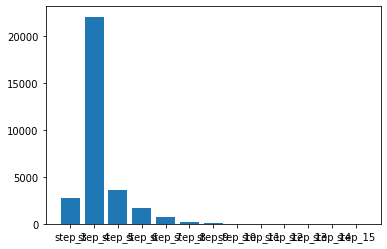

In [47]:
plt.bar(pur_dict.keys(),pur_dict.values())
plt.show()

In [ ]:
purchase["platform"].unique()

# TWITTER SHARE CONVERSION RATE

In [42]:
len(purchase.loc[df["platform"]=="twitter_share"])

3290

In [43]:
len(df.loc[df["platform"]=="twitter_share"])

15600

In [44]:
Twi_sh_CR=len(purchase.loc[df["platform"]=="twitter_share"])/len(df.loc[df["platform"]=="twitter_share"])*100
print(Twi_sh_CR)

21.08974358974359


# FACEBOOK sHARE CONVERSION RATE

In [28]:
len(purchase.loc[df["platform"]=="facebook_share"])

9327

In [29]:
len(df.loc[df["platform"]=="facebook_share"])

39600

In [30]:
fb_sh_CR=len(purchase.loc[df["platform"]=="facebook_share"])/len(df.loc[df["platform"]=="facebook_share"])*100
print(fb_sh_CR)

23.553030303030305


# FACEBOOK ADVERTS CONVERSION RATE

In [31]:
len(purchase.loc[df["platform"]=="facebook_advert"])

616

In [32]:
len(df.loc[df["platform"]=="facebook_advert"])

10000

In [33]:
fb_adv_CR=len(purchase.loc[df["platform"]=="facebook_advert"])/len(df.loc[df["platform"]=="facebook_advert"])*100

In [34]:
print(fb_adv_CR) 

6.16


# LINKEDIN ADVERTS CONVERSION RATE

In [73]:
len(purchase.loc[purchase["platform"]=='advert_linkedin'])

5004

In [74]:
len(df.loc[df["platform"]=='advert_linkedin'])

10000

In [75]:
lin_adv_CR=len(purchase.loc[purchase["platform"]=='advert_linkedin'])/len(df.loc[df["platform"]=='advert_linkedin'])*100
print(lin_adv_CR)

50.03999999999999


# PC LINKEDIN ADVERT CONVERSION RATE

In [93]:
pur_linked=purchase.loc[purchase["platform"]== "advert_linkedin"]
len(pur_linked.loc[(purchase["source"] == 'windows') | (purchase["source"] == 'mac')])

2420

In [96]:
pur_linked2=df.loc[df["platform"]== "advert_linkedin"]
len(pur_linked2.loc[(df["source"] == 'windows') | (df["source"] == 'mac')])

4000

In [98]:
PC_linkedin_CR= len(pur_linked.loc[(purchase["source"] == 'windows') | (purchase["source"] == 'mac')])/len(pur_linked2.loc[(df["source"] == 'windows') | (df["source"] == 'mac')])*100
print(PC_linkedin_CR)

60.5


# Pc Facebook advert conversion rate

In [100]:
pur_linked3=purchase.loc[purchase["platform"]== "facebook_advert"]
len(pur_linked3.loc[(purchase["source"] == 'windows') | (purchase["source"] == 'mac')])

275

In [101]:
pur_linked4=df.loc[df["platform"]== "advert_linkedin"]
len(pur_linked4.loc[(df["source"] == 'windows') | (df["source"] == 'mac')])

4000

In [103]:
PC_facebook_CR=len(pur_linked3.loc[(purchase["source"] == 'windows') | (purchase["source"] == 'mac')])/len(pur_linked4.loc[(df["source"] == 'windows') | (df["source"] == 'mac')])*100
print(PC_facebook_CR)

6.875000000000001


# mobile facebook conversion rate

In [109]:
pur_5=purchase.loc[purchase["platform"]== "facebook_advert"]
len(pur_5.loc[(purchase["source"] == 'ios') | (purchase["source"] == 'android')])

192

In [110]:
pur_6=df.loc[df["platform"]== "facebook_advert"]
len(pur_6.loc[(df["source"] == 'ios') | (df["source"] == 'android')])

4000

In [111]:
fb_mobile_CR=len(pur_5.loc[(purchase["source"] == 'ios') | (purchase["source"] == 'android')])/len(pur_6.loc[(df["source"] == 'ios') | (df["source"] == 'android')])*100
print(fb_mobile_CR)

4.8


# mobile linkedin conversion rate


In [113]:
pur_7=purchase.loc[purchase["platform"]== "advert_linkedin"]
len(pur_7.loc[(purchase["source"] == 'ios') | (purchase["source"] == 'android')])

1416

In [114]:
pur_8=df.loc[df["platform"]== "advert_linkedin"]
len(pur_8.loc[(df["source"] == 'ios') | (df["source"] == 'android')])

4000

In [115]:
link_mobile_CR=len(pur_7.loc[(purchase["source"] == 'ios') | (purchase["source"] == 'android')])/len(pur_8.loc[(df["source"] == 'ios') | (df["source"] == 'android')])*100
print(link_mobile_CR)

35.4


# mobile conversion rate

In [66]:
len(purchase.loc[(purchase["source"] == 'android') | (purchase["source"] == 'ios')])

13732

In [67]:
len(df.loc[(df["source"] == 'android') | (df["source"] == 'ios')])

81800

In [69]:
mobile_CR= len(purchase.loc[(purchase["source"] == 'android') |
                            (purchase["source"] == 'ios')])/len(df.loc[(df["source"] == 'android') |
                                                                       (df["source"] == 'ios')])*100
print(mobile_CR)

16.78728606356968


# PC conversion rate

In [136]:
len(purchase.loc[(purchase["source"] == 'mac') | (purchase["source"] == 'windows')])

15864

In [137]:
len(df.loc[(df["source"] == 'mac') | (df["source"] == 'windows')])

55600

In [138]:
PC_CR=len(purchase.loc[(purchase["source"] == 'mac') | (purchase["source"] == 'windows')])/len(df.loc[(df["source"] == 'mac') | (df["source"] == 'windows')])*100
print(PC_CR)

28.532374100719426


In [153]:
mm={'linkedIn_mobile':35.4,'linkedIn_PC':60.5,'facebook_mobile':4.8,'facebook_PC':6.87}


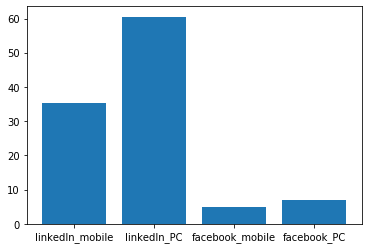

<Figure size 2160x2160 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [155]:
plt.bar(mm.keys(),mm.values())
plt.figure(figsize=(30,30))
plt.show()
plt.savefig('hist.png')